### Analyzing a real world data-set with SQL and Python


The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators


In [1]:
# import the module needed for this project
import csv, sqlite3, pandas


In [3]:
# create and connect to the database
con = sqlite3.connect('socioeconomic.db')
cur = con.cursor()

In [20]:
# Store the dataset in a Table
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")
df

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0
...,...,...,...,...,...,...,...,...,...
73,74.0,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,75.0,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,76.0,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,77.0,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [12]:
cur.execute('SELECT * FROM chicago_socioeconomic_data')
result = cur.fetchall()

In [19]:
# How many rows are in the dataset?
cur.execute('SELECT COUNT(*) FROM chicago_socioeconomic_data')
result = cur.fetchone()
result

(78,)

In [24]:
# How many community areas in Chicago have a hardship index greater than 50.0?
cur.execute('SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index > 50.0 ')
result = cur.fetchone()
result

(38,)

In [25]:
# What is the maximum value of hardship index in this dataset?
cur.execute('SELECT MAX(hardship_index) FROM chicago_socioeconomic_data  ')
result = cur.fetchone()
result

(98.0,)

In [26]:
# Which community area which has the highest hardship index?
cur.execute('SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index=(SELECT MAX(hardship_index) FROM chicago_socioeconomic_data) ')
result = cur.fetchone()
result

('Riverdale',)

In [31]:
# Which community area which has the highest hardship index?
cur.execute('SELECT community_area_name FROM chicago_socioeconomic_data ORDER BY  hardship_index DESC LIMIT 2')
result = cur.fetchone()
result

('Riverdale',)

In [32]:
# Which Chicago community areas have per-capita incomes greater than $60,000?
cur.execute('SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_>60000')
result = cur.fetchall()
result

[('Lake View',), ('Lincoln Park',), ('Near North Side',), ('Loop',)]

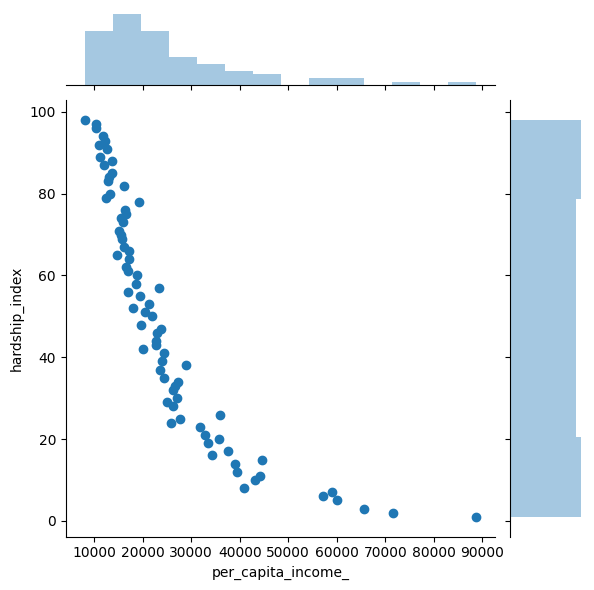

In [34]:
# Create a scatter plot using the variables per_capita_income_ and hardship_index. Explain the correlation between the two variables.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
cur.execute('SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data')
income_vs_hardship = cur.fetchall()

income_vs_hardship_df = pandas.DataFrame(income_vs_hardship, columns=['per_capita_income_', 'hardship_index'])

plot = sns.jointplot(x='per_capita_income_', y='hardship_index', data=income_vs_hardship_df, kind='scatter')

plt.show()